# Assignment 1 - Regularization with Ridge and Lasso Regressions
### Import libraries and data


In [43]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score

In [3]:
dpath = 'airbnb.csv'
tcol = 'price'
rseed = 1

In [4]:
df = pd.read_csv(dpath)

## 1. EDA

In [7]:
print(df.shape)
print(df.columns.tolist())

(74111, 29)
['id', 'log_price', 'property_type', 'room_type', 'amenities', 'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city', 'description', 'first_review', 'host_has_profile_pic', 'host_identity_verified', 'host_response_rate', 'host_since', 'instant_bookable', 'last_review', 'latitude', 'longitude', 'name', 'neighbourhood', 'number_of_reviews', 'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds']


In [8]:
df.head(10)

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0
5,12422935,4.442651,Apartment,Private room,"{TV,""Wireless Internet"",Heating,""Smoke detecto...",2,1.0,Real Bed,strict,True,...,37.753164,-122.429526,Comfort Suite San Francisco,Noe Valley,3,100.0,https://a0.muscache.com/im/pictures/82509143-4...,94131,1.0,1.0
6,11825529,4.418841,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",3,1.0,Real Bed,moderate,True,...,33.980454,-118.462821,Beach Town Studio and Parking!!!11h,NaN,15,97.0,https://a0.muscache.com/im/pictures/4c920c60-4...,90292,1.0,1.0
7,13971273,4.787492,Condominium,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Wheelchair...",2,1.0,Real Bed,moderate,True,...,34.046737,-118.260439,"Near LA Live, Staple's. Starbucks inside. OWN ...",Downtown,9,93.0,https://a0.muscache.com/im/pictures/61bd05d5-c...,90015,1.0,1.0
8,180792,4.787492,House,Private room,"{TV,""Cable TV"",""Wireless Internet"",""Pets live ...",2,1.0,Real Bed,moderate,True,...,37.781128,-122.501095,Cozy Garden Studio - Private Entry,Richmond District,159,99.0,https://a0.muscache.com/im/pictures/0ed6c128-7...,94121,1.0,1.0
9,5385260,3.583519,House,Private room,"{""Wireless Internet"",""Air conditioning"",Kitche...",2,1.0,Real Bed,moderate,True,...,33.992563,-117.895997,No.7 Queen Size Cozy Room 舒适大床房,NaN,2,90.0,https://a0.muscache.com/im/pictures/8d2f08ce-b...,91748,1.0,1.0


In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [10]:
print(df.isna().sum())

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     968
bedrooms                     91
beds                        131
dtype: int64


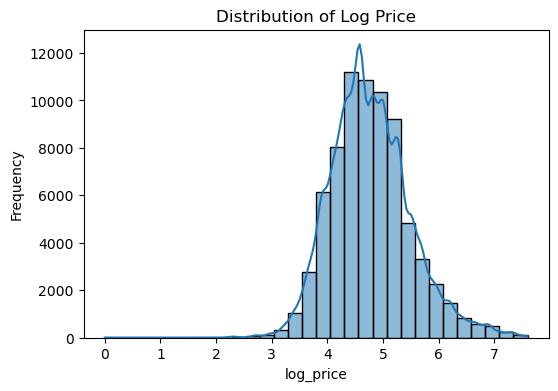

In [13]:
plt.figure(figsize=(6,4))
sns.histplot(df['log_price'], kde=True, bins=30)
plt.title("Distribution of Log Price")
plt.xlabel("log_price")
plt.ylabel("Frequency")
plt.show()

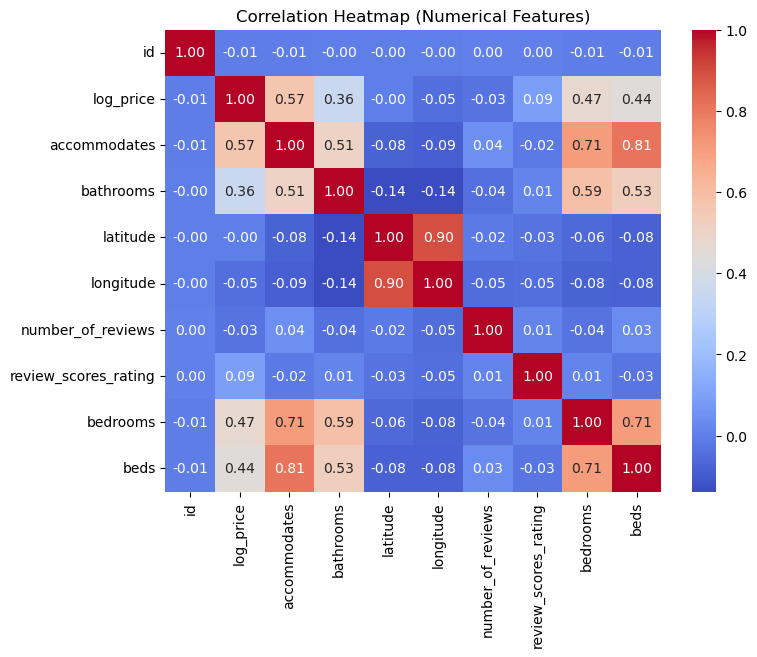

In [18]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(8,6))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

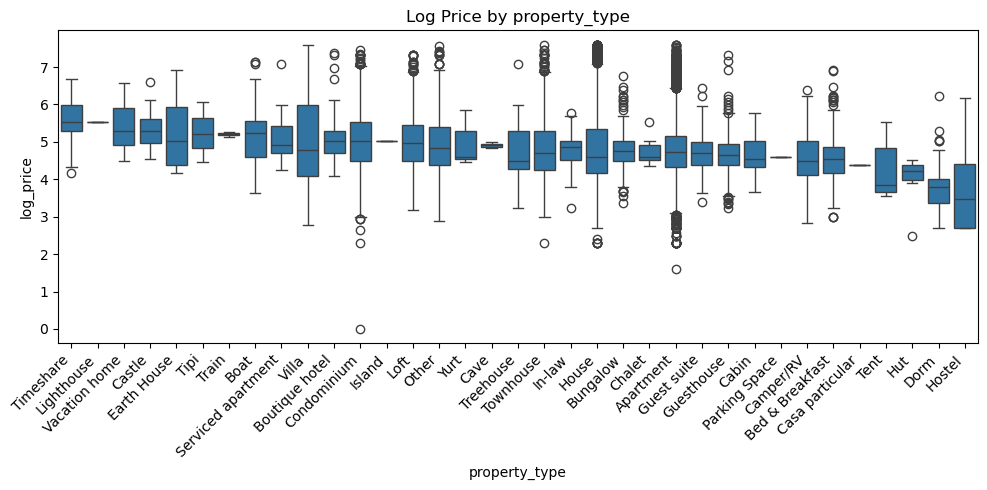

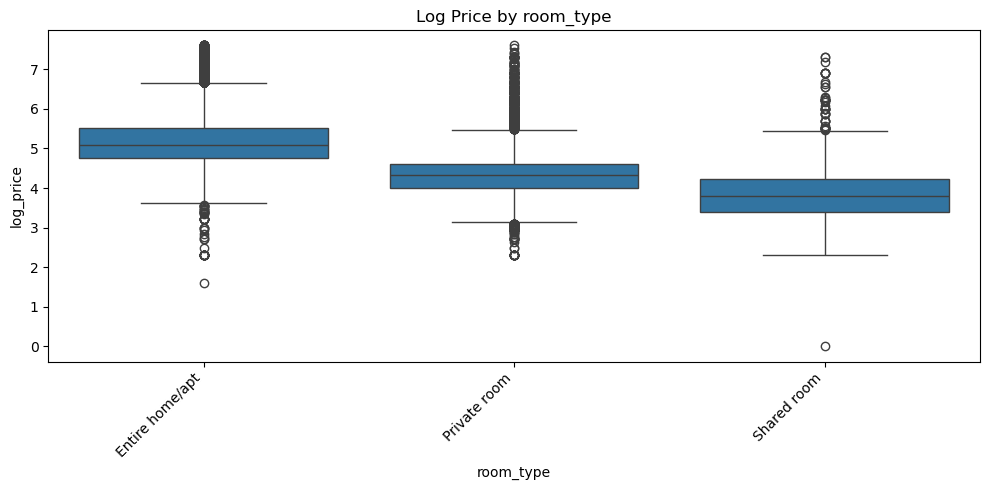

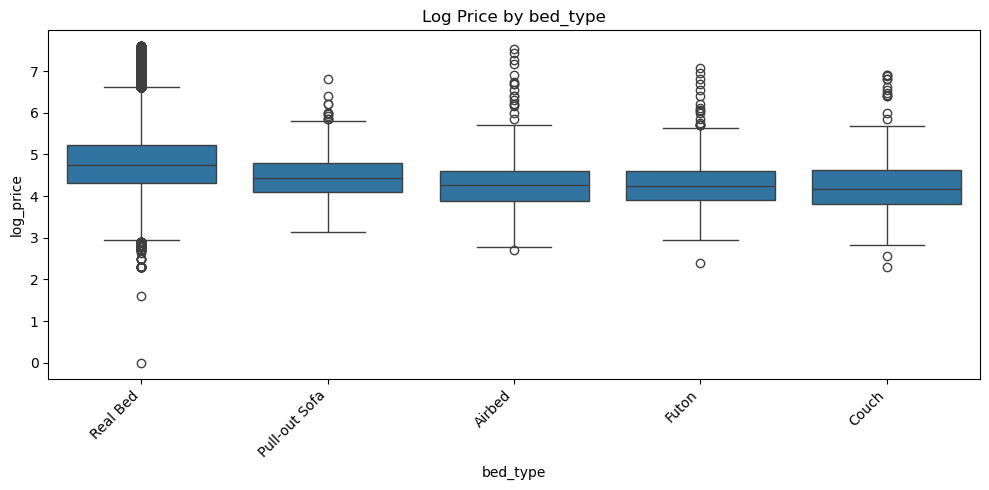

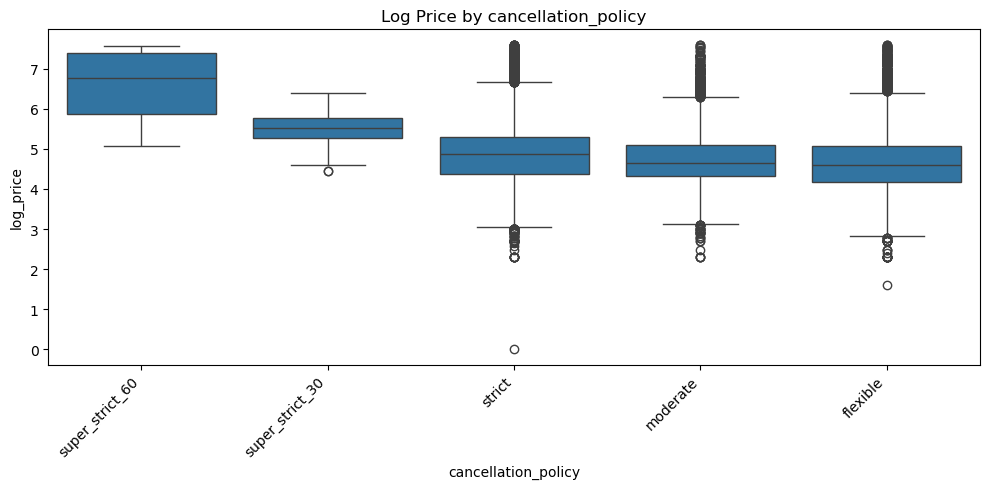

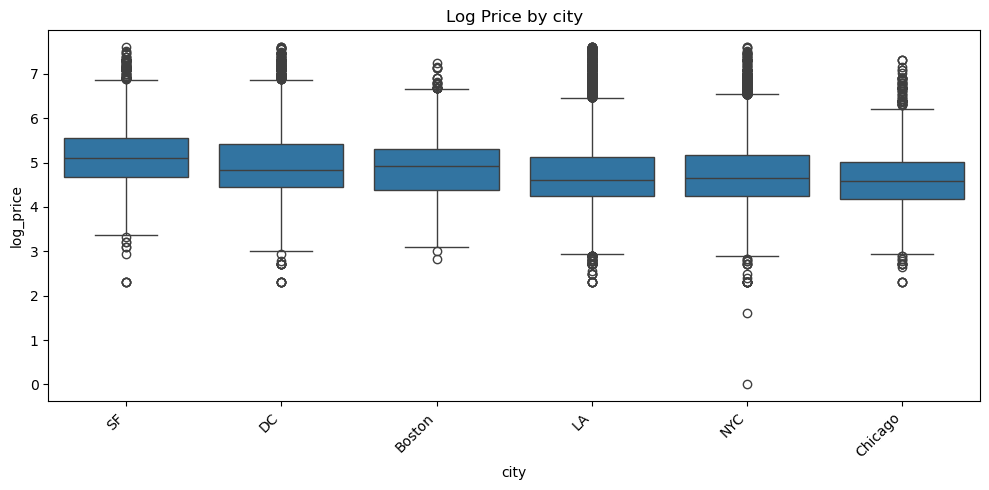

In [19]:
cat_features = ['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city']

for col in cat_features:
    plt.figure(figsize=(10,5))
    order = df.groupby(col)['log_price'].mean().sort_values(ascending=False).index
    sns.boxplot(x=col, y='log_price', data=df, order=order)
    plt.xticks(rotation=45, ha='right')
    plt.title(f"Log Price by {col}")
    plt.tight_layout()
    plt.show()

## 2. Preprocessing


In [ ]:
data = df.copy()

In [21]:
y = data['log_price']

In [22]:
drop_cols = [
    'id', 'log_price', 'name', 'description', 'thumbnail_url',
    'first_review', 'last_review', 'host_since'  # dates or text not directly useful here
]
X = data.drop(columns=drop_cols)

In [23]:
num_cols = X.select_dtypes(include=['int64', 'float64', 'bool']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

In [24]:
print("Numeric columns:", num_cols)
print("Categorical columns:", cat_cols)

Numeric columns: ['accommodates', 'bathrooms', 'cleaning_fee', 'latitude', 'longitude', 'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds']
Categorical columns: ['property_type', 'room_type', 'amenities', 'bed_type', 'cancellation_policy', 'city', 'host_has_profile_pic', 'host_identity_verified', 'host_response_rate', 'instant_bookable', 'neighbourhood', 'zipcode']


In [26]:
numeric_transformer = Pipeline(steps=[ # this part impute missing numeric values with the median
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [ ]:
categorical_transformer = Pipeline(steps=[ # here we use the most frequent value
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
preprocessor = ColumnTransformer( # combine the transformations
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ]
)

## 3. Train/Test Split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=rseed
)

## 4. Modelings

In [34]:
linear_model = LinearRegression()
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=0.1, max_iter=10000)

In [35]:
linear_pipeline = Pipeline(steps=[ # pipelines
    ('preprocessor', preprocessor),
    ('model', linear_model)
])

ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', ridge_model)
])

lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', lasso_model)
])


In [36]:
linear_pipeline.fit(X_train, y_train)
ridge_pipeline.fit(X_train, y_train)
lasso_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['accommodates', 'bathrooms',
                                                   'cleaning_fee', 'latitude',
                                                   'longitude',
                                                   'number_of_reviews',
                                                   'review_scores_rating',
                                                   'bedrooms', 'beds']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['property_type', 'room_type',
                                                   'amenities', 'bed_type',
                                                   'cancellation_policy',
                                                   'city',
                                                   'host_has_profile_pic',
                                                   'host_identity_verified',
                                                   'host_response_rate',
                                                   'instant_bookable',
                                                   'neighbourhood',
                                                   'zipcode'])])),
                ('model', Lasso(alpha=0.1, max_iter=10000))])

In [37]:
y_pred_linear_train = linear_pipeline.predict(X_train) # make predictions
y_pred_linear_test  = linear_pipeline.predict(X_test)

y_pred_ridge_train = ridge_pipeline.predict(X_train)
y_pred_ridge_test  = ridge_pipeline.predict(X_test)

y_pred_lasso_train = lasso_pipeline.predict(X_train)
y_pred_lasso_test  = lasso_pipeline.predict(X_test)

In [38]:
print(f"Linear Regression R2: {r2_score(y_train, y_pred_linear_train):.4f}, Test R2: {r2_score(y_test, y_pred_linear_test):.4f}")
print(f"Ridge Regression R2: {r2_score(y_train, y_pred_ridge_train):.4f}, Test R2: {r2_score(y_test, y_pred_ridge_test):.4f}")
print(f"Lasso Regression R2: {r2_score(y_train, y_pred_lasso_train):.4f}, Test R2: {r2_score(y_test, y_pred_lasso_test):.4f}")

Linear Regression R2: 0.9801, Test R2: 0.5156
Ridge Regression R2: 0.9038, Test R2: 0.6622
Lasso Regression R2: 0.3999, Test R2: 0.3993


## 5. Hyperparameter Alpha

In [47]:
alphas = np.logspace(-2, 2, 15)

In [48]:
ridge_cv = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RidgeCV(alphas=alphas, scoring='r2', cv=5))
])
ridge_cv.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['accommodates', 'bathrooms',
                                                   'cleaning_fee', 'latitude',
                                                   'longitude',
                                                   'number_of_reviews',
                                                   'review_scores_rating',
                                                   'bedrooms', 'beds']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='m...
                                                   'host_response_rate',
                                                   'instant_bookable',
                                                   'neighbourhood',
                                                   'zipcode'])])),
                ('model',
                 RidgeCV(alphas=array([1.00000000e-02, 1.93069773e-02, 3.72759372e-02, 7.19685673e-02,
       1.38949549e-01, 2.68269580e-01, 5.17947468e-01, 1.00000000e+00,
       1.93069773e+00, 3.72759372e+00, 7.19685673e+00, 1.38949549e+01,
       2.68269580e+01, 5.17947468e+01, 1.00000000e+02]),
                         cv=5, scoring='r2'))])

In [49]:
lasso_cv = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LassoCV(alphas=alphas, max_iter=1000, cv=5))
])
lasso_cv.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['accommodates', 'bathrooms',
                                                   'cleaning_fee', 'latitude',
                                                   'longitude',
                                                   'number_of_reviews',
                                                   'review_scores_rating',
                                                   'bedrooms', 'beds']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='m...
                                                   'host_identity_verified',
                                                   'host_response_rate',
                                                   'instant_bookable',
                                                   'neighbourhood',
                                                   'zipcode'])])),
                ('model',
                 LassoCV(alphas=array([1.00000000e-02, 1.93069773e-02, 3.72759372e-02, 7.19685673e-02,
       1.38949549e-01, 2.68269580e-01, 5.17947468e-01, 1.00000000e+00,
       1.93069773e+00, 3.72759372e+00, 7.19685673e+00, 1.38949549e+01,
       2.68269580e+01, 5.17947468e+01, 1.00000000e+02]),
                         cv=5))])

In [50]:
ridge_train_r2 = ridge_cv.score(X_train, y_train)
ridge_test_r2  = ridge_cv.score(X_test, y_test)

lasso_train_r2 = lasso_cv.score(X_train, y_train)
lasso_test_r2  = lasso_cv.score(X_test, y_test)

In [51]:
print(f"Ridge best alpha: {ridge_cv.named_steps['model'].alpha_:.4f}")
print(f"Lasso best alpha: {lasso_cv.named_steps['model'].alpha_:.4f}")

print(f"Ridge R2: {ridge_train_r2:.4f}, Test R2: {ridge_test_r2:.4f}")
print(f"Lasso R2: {lasso_train_r2:.4f}, Test R2: {lasso_test_r2:.4f}")

Ridge best alpha: 3.7276
Lasso best alpha: 0.0100
Ridge R2: 0.7947, Test R2: 0.6644
Lasso R2: 0.5378, Test R2: 0.5300


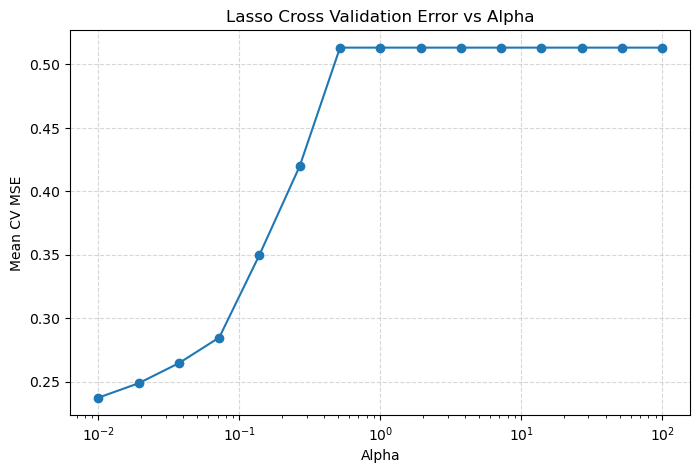

In [52]:
plt.figure(figsize=(8,5))
plt.plot(lasso_cv.named_steps['model'].alphas_, lasso_cv.named_steps['model'].mse_path_.mean(axis=-1), marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean CV MSE')
plt.title('Lasso Cross Validation Error vs Alpha')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()